# Revisão: distribuições amostrais (*sampling distributions*)

Chamamos de *distribuição amostral* à distribuição de probabilidades de estatística (que é uma variável aleatória cujos valores são produzidos aplicando uma função ao elementos de uma amostra). Pode ser considerada como a distribuição da estatística para todas as amostras possíveis da mesma população para um determinado tamanho de amostra.

O desvio padrão da distribuição amostral de uma estatística é conhecido como o **erro padrão** (*standard error*). Por exemplo, para o caso em que a estatística é a média amostral $\bar{x}$, o erro padrão é computado por meio da aplicação do TLC:

$$
\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}
$$

Recorde também que todos os procedimentos para estimar parâmetros e para testar hipóteses que estudamos até aqui possuem certas pressuposições sobre a população. Chamamos essas pressuposições de *condições de aplicabilidade*.
- “a variância da população é conhecida”
- “a população é aproximadamente normal”
- “as variâncias das amostras são aproximadamente iguais”

Métodos estatísticos que presumem algo acerca da distribuição da população em estudo são denominados *paramétricos*. Algum testes paramétricos que já estudamos: $z$-teste, $t$-teste, ANOVA).

Mas, e se tivermos apenas a amostra e não sabemos nada sobre a população? Ou se não podemos atender às condições de aplicabilidade do teste paramétrico que planejamos usar?
Nesses casos, uma alternativa é usar *métodos não paramétricos*. Um desses métodos é o denominado teste de permutação.

# Introdução

Considere um teste de hipóteses sobre duas amostras em que queremos verificar se essas amostras são ou não provenientes da mesma população. Já estudamos abordagens paramétricas para realizar essa tarefa ($z$-teste, $t$-teste, ANOVA). Agora, vamos estudar uma abordagem não-paramétrica para realizar esse tipo de teste. Essa abordagem é denominada teste de permutação (*permutation test*).

> Quando usar o teste de permutação? Quando os tamanhos amostrais são muito pequenos e, portanto, é difícil verificar o pressuposto de normalidade, o teste de permutação é uma boa alternativa ao teste t convencional ou ao teste t de Welch.

Considere duas amostras em que cada indivíduo (observação) está associado a um rótulo que identifica a que amostra o indivíduo pertence. Nesse contexto, podemos definir a hipótese nula da seguinte forma:

> $H_0$: "não há diferença estatisticamente significativa entre as médias das duas amostras".

Suponha que a hipótese nula seja verdadeira. Nesse caso, as duas amostras de observações são provenientes da mesma população, e qualquer diferença entre as suas médias se deve única e exclusivamente ao acaso. Isso significa mais ainda que os rótulos que identificam a que amostra cada indivíduo pertence são irrelevantes e poderíamos permutar indíviduos entre as duas amostras sem mudança no resultado do teste.

A argumentação acima sugere um procedimento para criar uma aproximação para a *distribuição nula* (i.e., a distribuição amostral da estatística de interesse, supondo que a hipótese nula seja verdadeira). Vamos descrever esse procedimento em seguida.

# Geração da distribuição nula

O procedimento para gerar uma aproximação para a distribuição nula envolve criar muitos pares de **reamostras** a partir do par de amostras originais. Cada par de reamostras é criado permutando aleatoriamente os indivíduos do par de amostras originais. Após a criação das reamostras, computamos a estatística de teste para cada uma delas. Esse conjunto de valores é então usado para produzir uma aproximação para a distribuição nula.

> Se as duas amostras originais são provenientes da mesma população, então cada amostra permutada terá a mesma probabilidade de ocorrer como qualquer outra. Portanto, quaisquer diferenças observadas serão pequenas e aleatórias se $H_0$ for verdadeiro.

Pelo exposto acima, podemos definir o procedimento para gerar a distribuição nula. Esse procedimento é descrito a seguir.

### Procedimento (geração da distribuição nula)

Entrada: duas amostras de tamanhos $n_1$ e $n_2$, respectivamente.

1. Calcule as médias das observações em cada grupo ($\overline{x}_{1}$ e $\overline{x}_{2}$) e determine a diferença $d = \overline{x}_{1} - \overline{x}_{2}$.

2. Agrupe as observações das duas amostras, o que resulta em uma única amostra.

3. Permute aleatoriamente as observações agrupadas na amostra única. (Ou seja, reorganize a ordem dos dados agrupados de maneira aleatória.)

4. Calcule a média da amostra para as primeiras $n_1$ observações resultantes da etapa 3. Em seguida, calcule a média da amostra das $n_2$ observações restantes.

5. Repita as etapas 3 e 4 por $B$ iterações e compute as diferenças entre as médias das remostras resultantes: $d_1,\ldots, d_B$.

Se repetirmos o procedimento descrito acima de permutar aleatoriamente os dados agrupados $B$ vezes, o resultado será um conjunto de $B$ diferenças entre as médias amostrais resultantes, que rotulamos como $d_1, \ldots, d_B$. Esses valores são então usados para gerar a aproximação para a distribuição nula.

### Exemplo

Para ilustrar a aplicação do procedimento acima, considere as duas amostras abaixo, de tamanhos $n_1 = 4$ e $n_2 = 5$.

- Grupo 1:	$6,	19,	34,	15$
- Grupo 2:	$9,	21,	8,	53, 25$

Os passos do procedimento aplicados neste caso são descritos a seguir.

1. Conforme descrito no passo 1, computamos a média do grupo 1 é ($\overline{x}_1 = 18.5$), e do grupo 2 ($\overline{x}_2 = 23.2$). Computamos também a diferença entre essas médias: $d = 18.5 - 23.2 = -4.7$

2. Agora agrupamos as observações de ambos os grupos, o que produz o seguinte:

$$
6,	19,	34,	15, 9,	21,	8,	53, 25
$$

3. Em seguida, permutamos os dados agrupados de forma aleatória. Para fins ilustrativos, suponha que o resultado da permutação seja: $34, 21, 8, 25, 6, 19, 15, 9, 53$. Essa permutação corresponde ao seguinte par de reamostras:

  - $R_1$: $34, 21, 8, 25$
  - R$_2$: $6, 19, 15, 9, 53$

4. A média amostral para a $R_1$ é igual a $22$, e para $R_2$ é igual a $20.4$. Sendo assim, a diferença entre essas médias é $d_1 = 22 - 20.4 = 1.6$.

### Quantidade de reamostras

No exemplo acima, repare que construímos um par de reamostras, de vários pares que poderiam ser construídos.

Você deve perceber que, para amostras originais de tamanhos $n_1$ e $n_2$, existem $(n_1+n_2)!$ permutações possíveis. Contudo, visto que a ordem dos elementos dentro de cada reamostra não é relevante, esse valor não corresponde à quantidade de reamostras possíveis. Em geral, dados o par de amostras originais de tamanhos $n_1$ e $n_2$, a quantidade de pares de reamostras possíveis que podem ser geradas é computada pela expressão a seguir:

$$
\text{quantidade de pares de reamostras} = \frac{(n_1 + n_2)!}{n_1!n_2!}
$$

O trecho de código a seguir ilustra de que forma essa quantidade pode ser computada usando a biblioteca itertools do Python.

In [ ]:
import itertools
import numpy as np

a = [2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 0]
b = [35, 36, 37, 40, 50, 70, 60, 48, 50, 70, 60, 48]

uniao = a + b
reamostras = list(itertools.combinations(uniao, len(a)))

print(f"Há {len(reamostras)} pares de reamostras possíveis.")

Há 5200300 reamostras possíveis.


Conforme ilustra a figura a seguir ([fonte](https://www.digitalocean.com/community/tutorials/js-big-o-notation)), a função fatorial cresce de forma muito acelerada.

![texto do link](https://assets.digitalocean.com/articles/alligator/js/big-o-notation/o-complexity.png)

Para fins de comparação, considere os valores a seguir:

$$
\begin{align}
\frac{5!}{e^5} & \approx 0.81 \\
\\
\frac{10!}{e^{10}} & \approx 164.7 \\
\\
\frac{15!}{e^{15}} & \approx 400000 \\
\\
\frac{20!}{e^{20}} &\approx 5014584787 \\
\\
\frac{25!}{e^{25}} &\approx 2 \times 10^{14}
\end{align}
$$

Esse crescimento acelerado da função fatorial inviabiliza a geração de todas as reamostras possíveis, mesmo para valores modestos (i.e., pequenos) de $n_1 + n_2$. Por conta disso, normalmente um valor $B$ igual a 10000 para a quantiade de reamostras é normalmente usado na prática.

## Relação entre distribuição nula e $p$-valor

Lembre-se de que, para aplicar um teste de hipóteses, precisamos computar o $p$-valor correspondente ao valor da estatística de teste resultante do par de amostras originais.

A definição do $p$-value para o teste de permutação é a mesma que utilizamos nos testes paramétricos: probabilidade de obter o resultado observado da estatística de teste (ou um mais extremo), presumindo que a hipótese nula seja verdadeira. Entretanto, como no teste de permutação a distribuição nula (i.e., a distribuição amostral da estatística de teste considerando que a hipótese nula é verdadeira) não corresponde a uma distribuição teórica (como a distribuição normal ou a distribuição t), o que devemos fazer é calcular o $p$-value como a proporção dos valores no histograma da distribuição nula que são iguais ou mais extremos do que o valor observado no par de amostras original.

A animação a seguir ([fonte](https://en.wikipedia.org/wiki/Permutation_test)) ilustra de que forma a sequências de passos do procedimento descrito acima pode gerar a distribuição nula para uma estatística de interesse. Ela ilustra também a relação dessa distribuição com o $p$-valor. Em particular, o $p$-valor é computado como a fração de diferenças maiores ou iguais à diferença entre as amostras originais.

![texto do link](https://upload.wikimedia.org/wikipedia/commons/1/12/Permutation_test_example_animation.gif)

## Aplicação do teste

Uma vez que o $p$-value tenha sido computado, devemos compará-lo a um nível de significância fornecido para finalmente definir o resultado do teste:

- se $p < \alpha$, há evidência para rejeitar $H_0$
- se $p \geq \alpha$, falhamos em rejeitar $H_0$

# Estudo de Caso I - Dados sintéticos

Observed Difference in Means: -5.67
P-value: 0.0196


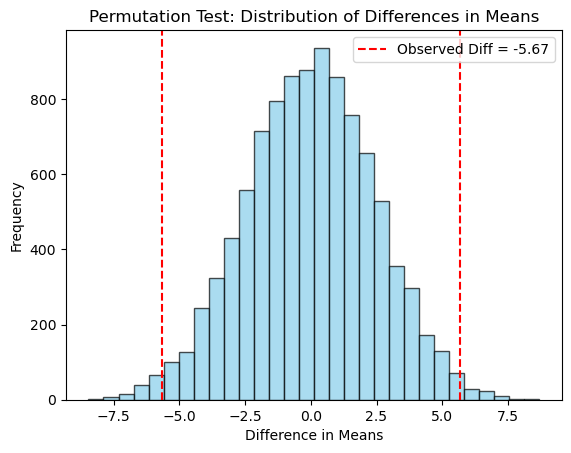

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def permutation_test(group1, group2, num_permutations=1000):
    """
    Perform a permutation test to compare the means of two groups.

    Parameters:
        group1 (array-like): Data for the first group.
        group2 (array-like): Data for the second group.
        num_permutations (int): Number of permutations to perform.

    Returns:
        p_value (float): The p-value of the test.
    """
    # Calculate the observed difference in means
    observed_diff = np.mean(group1) - np.mean(group2)

    # Combine both groups into a single array
    combined = np.concatenate([group1, group2])

    # Perform permutations
    perm_diffs = []
    for _ in range(num_permutations):
        # Shuffle the combined data
        np.random.shuffle(combined)
        
        # Split the shuffled data into two groups of the same size as the original groups
        perm_group1 = combined[:len(group1)]
        perm_group2 = combined[len(group1):]
        
        # Compute the difference in means for the permuted groups
        perm_diffs.append(np.mean(perm_group1) - np.mean(perm_group2))

    # Convert perm_diffs to a NumPy array for easier computation
    perm_diffs = np.array(perm_diffs)

    # Compute the p-value
    p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))

    return observed_diff, perm_diffs, p_value

# Example usage
np.random.seed(42)  # For reproducibility

# Generate synthetic data for two groups
group1 = np.random.normal(50, 10, 30)  # Group 1: mean=50, std=10, n=30
group2 = np.random.normal(55, 10, 30)  # Group 2: mean=55, std=10, n=30

# Perform the permutation test
observed_diff, perm_diffs, p_value = permutation_test(group1, group2, num_permutations=10000)

# Print the results
print(f"Observed Difference in Means: {observed_diff:.2f}")
print(f"P-value: {p_value:.4f}")

# Visualize the permutation distribution
plt.hist(perm_diffs, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(observed_diff, color='red', linestyle='dashed', label=f'Observed Diff = {observed_diff:.2f}')
plt.axvline(-observed_diff, color='red', linestyle='dashed')
plt.title('Permutation Test: Distribution of Differences in Means')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Estudo de Caso II - Chichen Data

Neste estudo de caso, vamos exemplificar a aplicação do teste de permutação usando os dados contidos no arquivo ChickData.csv. Esse arquivo contém observações sobre animais (filhotes de galináceos). Cada filhote recebeu um de dois tipos de dieta disponíveis desde seu nascimento. Após 3 semanas de vida, o peso de cada filhote foi medido. Nosso propósito é verificar se existe diferença estatisticamente significativa entre os dois tipos de dietas. Isto é, nosso objetivo é verificar a veracidade da seguinte afirmação:

> um dos tipos de dieta produz animais com uma média de pesos **diferente** do que o outro. 

Considere que o nível de significância definido para este estudo é $\alpha=0.05$.

Vamos iniciar definindo as hipóteses nula e alternativa. Considere que $\mu_d$ corresponda à diferença entre as médias de pesos das amostras.

- $H_0: \mu_{d} = 0$
- $H_a: \mu_{d} \neq 0$

Agora, vamos fazer a carga dos dados.

In [ ]:
import pandas as pd

df_chick = pd.read_csv('./ChickData.csv')

print(df_chick.shape)

(23, 2)


In [ ]:
df_chick.head(23)

,weight,feed
0,325,meatmeal
1,257,meatmeal
2,303,meatmeal
3,315,meatmeal
4,380,meatmeal
5,153,meatmeal
6,263,meatmeal
7,242,meatmeal
8,206,meatmeal
9,344,meatmeal


Note pelo histograma abaixo que a amostra unificada não parece seguir a distribuição normal, o que exclui a possiblidade de aplicar um teste paramétrico como o $t$-teste, por exemplo.

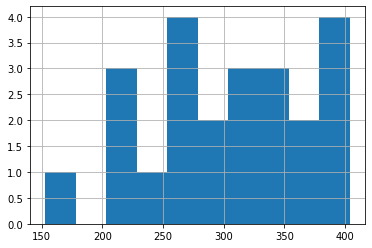

In [ ]:
df_chick.weight.hist()

Repare que cada filhote recebeu um dos dois tipos de dieta (*meatmeal* ou *casein*).

In [ ]:
df_chick.feed.unique()

array(['meatmeal', 'casein'], dtype=object)

Podemos também identificar os pesos (medidos após três semanas de vida) dos filhotes que receberam cada tipo de dieta, conforme os dois blocos de código abaixo. Esses dois conjuntos de pesos correspondem ao par de amostras original.

In [ ]:
df_chick.loc[df_chick['feed'] == 'meatmeal', 'weight'].tolist()

[325, 257, 303, 315, 380, 153, 263, 242, 206, 344, 258]

In [ ]:
df_chick.loc[df_chick['feed'] == 'casein', 'weight'].tolist()

[368, 390, 379, 260, 404, 318, 352, 359, 216, 222, 283, 332]

Agora, podemos computar a diferença observada entre as médias de pesos dos animais em cada tipo de dieta.

In [ ]:
import numpy as np

list_meatmeal = df_chick.loc[df_chick['feed'] == 'meatmeal', 'weight'].tolist()
list_casein = df_chick.loc[df_chick['feed'] == 'casein', 'weight'].tolist()

agg_list = list_meatmeal + list_casein

sample_meatmeal = np.array(list_meatmeal)
sample_casein = np.array(list_casein)
agg_sample = np.array(agg_list)

print(sample_meatmeal.mean())
print(sample_casein.mean())
print(agg_sample.mean())

observed_diff = np.abs(sample_meatmeal.mean() - sample_casein.mean())
print('Diferença observada no par de amostras original: %.2f' % observed_diff)

276.90909090909093
323.5833333333333
301.2608695652174
Diferença observada no par de amostras original: 46.67


Agora vamos construir a distribuição da estatística. Para isso, precisamos inicialmente produzir diferentes pares de reamostras. Em seguida, para cada par de reamostra gerado, computamos a diferença entre suas médias de pesos. O conjunto de valores assim gerado é então usado para produzir uma estimativa da distribuição amostral da estatística de interesse.

In [ ]:
import random

debug = False

a_perm = list_meatmeal + list_casein
B = 10000 # total de pares de reamostras a ser gerado
diffs = np.zeros(B)
for i in range(B):
  random.shuffle(a_perm)
  mean_first_resample = np.array(a_perm[:12]).mean()
  mean_second_resample = np.array(a_perm[12:]).mean()

  if debug:
    print(a_perm)
    print(a_perm[:12])
    print(a_perm[12:])
    print()

  diffs[i] = mean_first_resample - mean_second_resample

O código acima produz $10000$ pares de reamostras, cada um dos quais é usado para computar um valor da estatística.

In [ ]:
diffs.shape

(10000,)

Para fins de inspeção, observe abaixo os primeiros quinze valores computados.

In [ ]:
print(diffs[:15])

[ 29.59848485  -7.51515152   4.15909091   7.46969697  28.90151515
  23.32575758  45.10606061 -41.84090909  10.43181818 -31.73484848
  -2.98484848 -28.25       -16.22727273 -21.8030303  -24.24242424]


Agora, tomando todos os $10000$ valores, podemos produzir o gráfico da distribuição amostral empírica (i.e., da distribuição nula) da estatística, conforme o bloco de código a seguir.

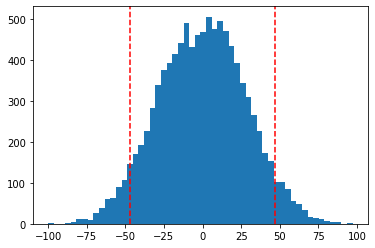

In [ ]:
import matplotlib.pyplot as plt

_ = plt.hist(diffs, bins='auto')
plt.axvline(observed_diff, c='r', linestyle='--');
plt.axvline(-observed_diff, c='r', linestyle='--');

Repare que no gráfico da distribuição nula acima, também foi destacado o valor crítico em ambas as caudas da distribuição (linhas tracejadas em vermelho). O $p$-valor nesse caso corresponde à proporção de valores da estatística de teste que são iguais ou mais extremos do que o valor observado no par de amostras originais.

In [ ]:
np.where(diffs > observed_diff)[0].shape[0]

463

In [ ]:
np.where(diffs < -observed_diff)[0].shape[0]

504

In [ ]:
np.where(diffs > observed_diff)[0].shape[0] + np.where(diffs < -observed_diff)[0].shape[0]

967

Já que sabemos a quantidade de valores da estatística que são tão ou mais extremos do que o valor crítico, podemos usar essa quantidade para computar o $p$-valor.

Repare que, diante da forma como a hipótese alternativa foi definida, devemos realizar um *teste bilateral*. Isso significa que devemos somar as quantidades de valores da estatística para ambas as caudas da distribuição.

In [ ]:
n = np.where(diffs > observed_diff)[0].shape[0] + np.where(diffs < -observed_diff)[0].shape[0]
print("p-valor: %.2f" % (n / B))

p-valor: 0.10


Se considerarmos que o nível de significância definido para o estudo foi $\alpha = 0.05$, então a conclusão a que chegamos é a de que não podemos rejeitar a hipótese nula, visto que $p > \alpha$. Sendo assim, não há evidência suficiebte para afirmar que os dois tipos de dieta são diferentes em sua efetividade em termos de ganho de peso.

# Referências comentadas

- Veja esse [vídeo](https://youtu.be/xRzEWLfEEIA) para uma demonstração de como o teste apresentado aqui pode ser realizado em R.
- Este [capítulo do livro](https://www.macmillanlearning.com/studentresources/college/statistics/bps8e/web_exercises/42578_ch32_online.pdf) também é relevante para o conteúdo aqui apresentado.